In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [7]:
# Dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)

target = iris.target_names
labels = iris.target

# menampilkan 5 data awal
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# menampilkan 5 data awal setelah di skalakan
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [14]:
#PCA Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k = 3

datapoints

array([[-6.30702931e-01,  1.07577910e-01, -1.87190977e-02],
       [-6.22904943e-01, -1.04259833e-01, -4.91420253e-02],
       [-6.69520395e-01, -5.14170597e-02,  1.96441728e-02],
       [-6.54152759e-01, -1.02884871e-01,  2.32185515e-02],
       [-6.48788056e-01,  1.33487576e-01,  1.51155243e-02],
       [-5.35272778e-01,  2.89615724e-01,  2.54378874e-02],
       [-6.56537790e-01,  1.07244911e-02,  9.18347789e-02],
       [-6.25780499e-01,  5.71335411e-02, -1.40277647e-02],
       [-6.75643504e-01, -2.00703283e-01,  3.59520802e-02],
       [-6.45644619e-01, -6.72080097e-02, -6.17055833e-02],
       [-5.97408238e-01,  2.17151953e-01, -5.12740810e-02],
       [-6.38943190e-01,  3.25988375e-02,  2.44981902e-02],
       [-6.61612593e-01, -1.15605495e-01, -5.47803418e-02],
       [-7.51967943e-01, -1.71313322e-01,  4.76777938e-02],
       [-6.00371589e-01,  3.80240692e-01, -8.51695344e-02],
       [-5.52157227e-01,  5.15255982e-01,  3.82732690e-02],
       [-5.77053593e-01,  2.93709492e-01

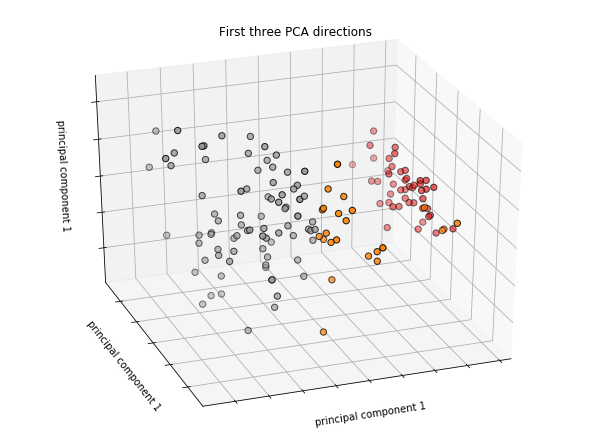

In [12]:
#Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [16]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)

print(medoids_initial)

[[-0.60037159  0.38024069 -0.08516953]
 [-0.15863457 -0.28913985  0.0524159 ]
 [ 0.21396272  0.059963   -0.11409813]]


In [17]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, kalau sebuah array berdimensi 1 tersedia,
    # it will be reshaped to a single row 2-D array, itu akan di bentuk ulang ke array single row berdimensi 2
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S
  
S = compute_d_p(datapoints, medoids_initial, 2) #ubah points ke datapoints

print(S)

[[0.07968064 0.3852937  0.7248244 ]
 [0.23654649 0.26004161 0.73153592]
 [0.20209589 0.31859043 0.81083493]
 [0.2480507  0.28108167 0.79899978]
 [0.07328835 0.42025569 0.76644093]
 [0.02468474 0.47754216 0.6335645 ]
 [0.17102739 0.33938008 0.80260393]
 [0.11010499 0.34254533 0.71519075]
 [0.35783221 0.27539032 0.88186121]
 [0.20281054 0.29945624 0.75784222]
 [0.02775562 0.45960533 0.68697806]
 [0.13436964 0.33499155 0.74740623]
 [0.2505374  0.29459209 0.80097502]
 [0.3448417  0.36595003 1.01268223]
 [0.         0.66213165 0.76655503]
 [0.03579188 0.80211274 0.81744851]
 [0.02127369 0.51529454 0.70108133]
 [0.08302796 0.35731766 0.68556492]
 [0.01509555 0.47944961 0.59289047]
 [0.0437377  0.46409076 0.73404497]
 [0.0792879  0.33420167 0.59754411]
 [0.06094364 0.39785527 0.67347669]
 [0.13666818 0.48174381 0.95211424]
 [0.14542075 0.221955   0.53921336]
 [0.13435467 0.304104   0.69419534]
 [0.2257257  0.23940289 0.67240978]
 [0.12172922 0.28123198 0.62386942]
 [0.0707443  0.37683029 0.68

In [18]:
def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)

print(labels)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        #change points to datapoints
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))
        #change points to datapoints
        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap # ubah datap ke datapoints
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p)) #ubah points ke datapoints
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [24]:
# Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]

print(final_medoids)

[[-0.50609386  0.02794708  0.02628302]
 [-0.00826092 -0.0866611   0.05357911]
 [ 0.03302937 -0.04297085  0.01560933]]


In [25]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [21]:
# Proses Perhitungan
def mark_matches(a, b, exact=False):
    """
    Diberikan dua larik Numpy dengan label {0, 1}, mengembalikan boolean yang baru,
     array yang menunjukkan di lokasi mana array input memiliki
     label yang sama (yaitu, entri yang sesuai adalah True).
    
     Fungsi ini dapat mempertimbangkan kecocokan "tidak tepat". Artinya, jika `tepat`
     False, maka fungsinya akan menganggap label {0, 1} mungkin
     dianggap sama hingga penukaran label. Fitur ini
     memungkinkan
    
       a == [0, 0, 1, 1, 0, 1, 1]
       b == [1, 1, 0, 0, 1, 0, 0]
      
     untuk dianggap setara. (Artinya, gunakan `exact = False` saat Anda
     hanya peduli tentang pelabelan "relatif".)
    """
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

def count_matches(a, b, exact=False):
    """
    Diberikan dua set label {0, 1}, mengembalikan jumlah ketidakcocokan.
    
     Fungsi ini dapat mempertimbangkan kecocokan "tidak tepat". Artinya, jika `tepat`
     False, maka fungsinya akan menganggap label {0, 1} mungkin
     dianggap serupa hingga menukar label. Fitur ini
     memungkinkan
    
       a == [0, 0, 1, 1, 0, 1, 1]
       b == [1, 1, 0, 0, 1, 0, 0]
      
     untuk dianggap setara. (Artinya, gunakan `exact = False` saat Anda
     hanya peduli tentang pelabelan "relatif".)
    """
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matches out of",
      len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

142 matches out of 150 data points (~ 94.7%)
